<a href="https://colab.research.google.com/github/318281029SBH/Curso-CIDWA/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
from sklearn.model_selection import train_test_split

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/drive/MyDrive/dataSet/churn.csv')

In [4]:
df.shape

(7043, 21)

In [5]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [50]:
df['Churn'].value_counts(1)

,proportion
Churn,
No,0.73463
Yes,0.26537


In [110]:
df['Churn']=df['Churn'].map({'Yes':1,'No':0})

##OverSampling

In [111]:
tgt=['Churn']
um=['customerID']
var=[col for col in df.columns if col not in tgt]

In [112]:
from imblearn.over_sampling import RandomOverSampler
ros= RandomOverSampler(random_state=0)
X_ros,y_ros=ros.fit_resample(df[var],df[tgt])
# Combine X_ros and y_r0s into a single DataFrame
data_ros = pd.concat([X_ros, y_ros], axis=1)

In [113]:
data_ros['Churn'].value_counts(1)

,proportion
Churn,
0,0.5
1,0.5


In [114]:
data_ros.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#Training and Test data sets

In [158]:
X_train, X_test, y_train, y_test = train_test_split(data_ros.drop('Churn',axis=1), data_ros['Churn'], test_size=0.3, stratify=data_ros['Churn'], random_state=42)

In [196]:
# The following code was commented out because the merge operation resulted in a DataFrame X with an inconsistent number of samples compared to y_train,
# causing errors during model fitting. Using X_train and y_train directly from train_test_split is recommended for consistent sample sizes.
# X=pd.concat([X_train, y_train], axis=1)
# y_train_df = y_train.reset_index()
# y_train_df = y_train_df.rename(columns={'index': 'customerID'})
# X = pd.merge(X_train, y_train_df, on='customerID', how='inner')

In [143]:
X.columns

Index(['customerID', 'gender_x', 'SeniorCitizen_x', 'Partner_x',
       'Dependents_x', 'tenure_x', 'PhoneService_x', 'MultipleLines_x',
       'InternetService_x', 'OnlineSecurity_x', 'OnlineBackup_x',
       'DeviceProtection_x', 'TechSupport_x', 'StreamingTV_x',
       'StreamingMovies_x', 'Contract_x', 'PaperlessBilling_x',
       'PaymentMethod_x', 'MonthlyCharges_x', 'TotalCharges_x', 'gender_y',
       'SeniorCitizen_y', 'Partner_y', 'Dependents_y', 'tenure_y',
       'PhoneService_y', 'MultipleLines_y', 'InternetService_y',
       'OnlineSecurity_y', 'OnlineBackup_y', 'DeviceProtection_y',
       'TechSupport_y', 'StreamingTV_y', 'StreamingMovies_y', 'Contract_y',
       'PaperlessBilling_y', 'PaymentMethod_y', 'MonthlyCharges_y',
       'TotalCharges_y'],
      dtype='object')

CAT_VARIABLES

In [6]:
var_cat = df.select_dtypes(include='object').columns

In [40]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
var_ord= ['tenure','MonthlyCharges','TotalCharges']
var_cat = [col for col in list(df.columns) if col not in var_ord+tgt+um]

In [12]:
def freq(df, var):

    if type(var) != list:
        var = [var]
    for v in var:
        #v = 'state'
        aux = df[v].value_counts().to_frame().rename(columns={'count':'FA'})
        aux['FR'] = aux['FA'] / aux['FA'].sum()
        aux[['FAA','FRA']] = aux.apply(  np.cumsum )
        print(f"La variable: {v}")
        display(aux)
        print("\n")

In [13]:
freq(data_ros, var_cat)

La variable: gender


,FA,FR,FAA,FRA
gender,,,,
Male,5197,0.502223,5197,0.502223
Female,5151,0.497777,10348,1.000000




La variable: SeniorCitizen


,FA,FR,FAA,FRA
SeniorCitizen,,,,
0,8373,0.809142,8373,0.809142
1,1975,0.190858,10348,1.000000




La variable: Partner


,FA,FR,FAA,FRA
Partner,,,,
No,5769,0.557499,5769,0.557499
Yes,4579,0.442501,10348,1.000000




La variable: Dependents


,FA,FR,FAA,FRA
Dependents,,,,
No,7633,0.73763,7633,0.73763
Yes,2715,0.26237,10348,1.00000




La variable: PhoneService


,FA,FR,FAA,FRA
PhoneService,,,,
Yes,9370,0.905489,9370,0.905489
No,978,0.094511,10348,1.000000




La variable: MultipleLines


,FA,FR,FAA,FRA
MultipleLines,,,,
No,4919,0.475358,4919,0.475358
Yes,4451,0.430131,9370,0.905489
No phone service,978,0.094511,10348,1.000000




La variable: InternetService


,FA,FR,FAA,FRA
InternetService,,,,
Fiber optic,5382,0.520101,5382,0.520101
DSL,3246,0.313684,8628,0.833784
No,1720,0.166216,10348,1.000000




La variable: OnlineSecurity


,FA,FR,FAA,FRA
OnlineSecurity,,,,
No,6075,0.587070,6075,0.587070
Yes,2553,0.246714,8628,0.833784
No internet service,1720,0.166216,10348,1.000000




La variable: OnlineBackup


,FA,FR,FAA,FRA
OnlineBackup,,,,
No,5258,0.508118,5258,0.508118
Yes,3370,0.325667,8628,0.833784
No internet service,1720,0.166216,10348,1.000000




La variable: DeviceProtection


,FA,FR,FAA,FRA
DeviceProtection,,,,
No,5239,0.506281,5239,0.506281
Yes,3389,0.327503,8628,0.833784
No internet service,1720,0.166216,10348,1.000000




La variable: TechSupport


,FA,FR,FAA,FRA
TechSupport,,,,
No,6055,0.585137,6055,0.585137
Yes,2573,0.248647,8628,0.833784
No internet service,1720,0.166216,10348,1.000000




La variable: StreamingTV


,FA,FR,FAA,FRA
StreamingTV,,,,
No,4528,0.437572,4528,0.437572
Yes,4100,0.396212,8628,0.833784
No internet service,1720,0.166216,10348,1.000000




La variable: StreamingMovies


,FA,FR,FAA,FRA
StreamingMovies,,,,
No,4467,0.431678,4467,0.431678
Yes,4161,0.402107,8628,0.833784
No internet service,1720,0.166216,10348,1.000000




La variable: Contract


,FA,FR,FAA,FRA
Contract,,,,
Month-to-month,6809,0.658002,6809,0.658002
One year,1770,0.171048,8579,0.829049
Two year,1769,0.170951,10348,1.000000




La variable: PaperlessBilling


,FA,FR,FAA,FRA
PaperlessBilling,,,,
Yes,6652,0.64283,6652,0.64283
No,3696,0.35717,10348,1.00000




La variable: PaymentMethod


,FA,FR,FAA,FRA
PaymentMethod,,,,
Electronic check,4225,0.408291,4225,0.408291
Mailed check,2177,0.210379,6402,0.618670
Bank transfer (automatic),1995,0.192791,8397,0.811461
Credit card (automatic),1951,0.188539,10348,1.000000


#Ord_Variables

In [14]:
from sklearn.preprocessing import KBinsDiscretizer
def discretizar_2(df_aux, v, k):

    kb = KBinsDiscretizer(n_bins=k, encode='ordinal', strategy='quantile', subsample=None)
    df_aux = df_aux.copy()

    # Asegurar que no haya valores NaN antes de discretizar
    df_aux[v] = pd.to_numeric(df_aux[v], errors='coerce')
    df_aux = df_aux.dropna(subset=[v])

    # Ajustar el discretizador
    kb.fit(df_aux[[v]])

    # Obtener los intervalos como strings usando pd.cut()
    bins = kb.bin_edges_[0]  # Extraer los límites de los bins
    df_aux[f'd_{v}_{k}'] = pd.cut(df_aux[v], bins=bins, include_lowest=True).astype(str)

    return df_aux

In [139]:
X.columns

Index(['customerID', 'gender_x', 'SeniorCitizen_x', 'Partner_x',
       'Dependents_x', 'tenure_x', 'PhoneService_x', 'MultipleLines_x',
       'InternetService_x', 'OnlineSecurity_x', 'OnlineBackup_x',
       'DeviceProtection_x', 'TechSupport_x', 'StreamingTV_x',
       'StreamingMovies_x', 'Contract_x', 'PaperlessBilling_x',
       'PaymentMethod_x', 'MonthlyCharges_x', 'TotalCharges_x', 'gender_y',
       'SeniorCitizen_y', 'Partner_y', 'Dependents_y', 'tenure_y',
       'PhoneService_y', 'MultipleLines_y', 'InternetService_y',
       'OnlineSecurity_y', 'OnlineBackup_y', 'DeviceProtection_y',
       'TechSupport_y', 'StreamingTV_y', 'StreamingMovies_y', 'Contract_y',
       'PaperlessBilling_y', 'PaymentMethod_y', 'MonthlyCharges_y',
       'TotalCharges_y'],
      dtype='object')

In [161]:
for v in var_ord:
    for k in range(2, 4):
        # cuando k es mayor al número de valores únicos
        if X[v].nunique() < k:
            print(f"Saltando {v} con {k} bins porque tiene pocos valores únicos.")
            continue
        print(f"Para la variable {v}, con {k} bins.")
        #df = discretizar(df, v, k)
        X = discretizar_2(X, v, k)

Para la variable tenure, con 2 bins.
Para la variable tenure, con 3 bins.
Para la variable MonthlyCharges, con 2 bins.
Para la variable MonthlyCharges, con 3 bins.
Para la variable TotalCharges, con 2 bins.
Para la variable TotalCharges, con 3 bins.


#FeatureSelection

In [51]:
def calculo_iv(df , v, tgt, um):
    #v = 'n_week_day_2'
    aux = df.pivot_table( index = v , columns=tgt, values=um, aggfunc='count', fill_value=0 )
    aux[ list(range(2)) ] = aux/aux.apply(np.sum)
    aux['w'] = np.log( aux[0] / aux[1] )
    aux['iv'] = (aux[0] - aux[1])*aux['w']

    return v, aux['iv'].sum()

In [162]:
iv2  = pd.DataFrame( map( lambda v: calculo_iv(X, v, tgt, um) , var_cat ) , columns=['variable','IV'] ).sort_values('IV',ascending=False)
iv2

,variable,IV
13,Contract,1.268634
10,TechSupport,0.742218
7,OnlineSecurity,0.728157
6,InternetService,0.618994
8,OnlineBackup,0.530763
9,DeviceProtection,0.516015
15,PaymentMethod,0.430231
11,StreamingTV,0.397325
12,StreamingMovies,0.394662
14,PaperlessBilling,0.202449


Ordinales, discretizadas

In [165]:
vard=X.filter(like='d_').columns.tolist()

In [166]:
vard

['d_tenure_2',
 'd_tenure_3',
 'd_MonthlyCharges_2',
 'd_MonthlyCharges_3',
 'd_TotalCharges_2',
 'd_TotalCharges_3']

In [168]:
### IV para las variables discretizadas:
iv  = pd.DataFrame( map( lambda v: calculo_iv(X, v, tgt, um) , vard) , columns=['variable','IV'] ).sort_values('IV',ascending=False)
iv

,variable,IV
1,d_tenure_3,0.646230
0,d_tenure_2,0.515786
5,d_TotalCharges_3,0.219042
4,d_TotalCharges_2,0.177260
3,d_MonthlyCharges_3,0.164240
2,d_MonthlyCharges_2,0.143854


In [169]:
best_d=iv.loc[iv['IV']>0.2]
best_c=iv2.loc[iv2['IV']>0.2]

In [170]:
best=pd.concat([best_d,best_c])

In [171]:
best_gen_vars=[]
for v in var_ord+var_cat:
  if best[best['variable'].str.contains(v)].shape[0]>0:
    best_gen_vars.append(v)

In [94]:
best_gen_vars

['tenure',
 'TotalCharges',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [172]:
best_var=[]
for v in best_gen_vars:
  best_var.append(best[best['variable'].str.contains(v)].sort_values('IV',ascending=False)['variable'].values[0])
best_var

['d_tenure_3',
 'd_TotalCharges_3',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

#WOE map

In [96]:
def clasificacion_woe(df , v, tgt, um):
    #v = 'n_week_day_2'
    aux = df.pivot_table( index = v ,
                          columns=tgt,
                         values=um,
                         aggfunc='count',
                         fill_value=0 )

    aux[ list(range(2)) ] = aux/aux.apply(np.sum)

    aux['w'] = np.log( aux[0] / aux[1] )

    aux.drop(range(2),axis=1,inplace=True)

    #aux = aux.to_dict()['w']
    aux = aux['w'].to_dict()



    return v, aux

In [173]:
mapa_woe = list( map( lambda v: clasificacion_woe( X, v , tgt , um) , best_var ))

In [174]:
mapa_woe

[('d_tenure_3',
  {'(-0.001, 10.0]': -0.9913663916806053,
   '(10.0, 39.0]': 0.017543665269770786,
   '(39.0, 72.0]': 1.047388374503269}),
 ('d_TotalCharges_3',
  {'(18.849, 502.6]': -0.6337072338797556,
   '(2359.1, 8684.8]': 0.5103842696080444,
   '(502.6, 2359.1]': 0.11440841744071625}),
 ('InternetService',
  {'DSL': 0.4187751684673981,
   'Fiber optic': -0.6834037675482856,
   'No': 1.537613333204472}),
 ('OnlineSecurity',
  {'No': -0.6912898077178781,
   'No internet service': 1.537613333204472,
   'Yes': 0.7357678861890068}),
 ('OnlineBackup',
  {'No': -0.608608485591557,
   'No internet service': 1.537613333204472,
   'Yes': 0.2465502977913818}),
 ('DeviceProtection',
  {'No': -0.5881363184726077,
   'No internet service': 1.537613333204472,
   'Yes': 0.22252852736955953}),
 ('TechSupport',
  {'No': -0.7019466022173646,
   'No internet service': 1.537613333204472,
   'Yes': 0.7533334215976348}),
 ('StreamingTV',
  {'No': -0.372188121242089,
   'No internet service': 1.537613333

In [175]:
for v, mapa in mapa_woe:
    X['w_'+v] = X[v].replace(mapa)

/tmp/ipython-input-362993824.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['w_'+v] = X[v].replace(mapa)
/tmp/ipython-input-362993824.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['w_'+v] = X[v].replace(mapa)
/tmp/ipython-input-362993824.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
 

In [187]:
varw=X.filter(like='w_').columns.tolist()

In [185]:
from sklearn.linear_model import LogisticRegression
modelo_fraude = LogisticRegression()

In [197]:
modelo_fraude.fit(X[varw] , X['Churn'])

LogisticRegression()

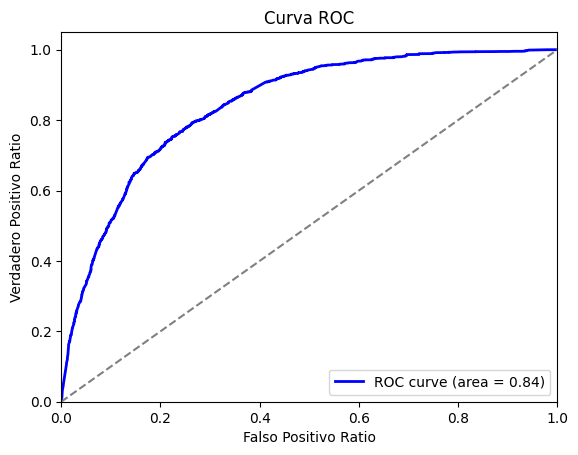

In [199]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_true = X['Churn']
y_scores = modelo_fraude.predict_proba(X[varw])[:,1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Falso Positivo Ratio")
plt.ylabel("Verdadero Positivo Ratio")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()